In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def json_to_list(json_file):
  with open(json_file) as f:
    data = json.load(f)
  nsi_list = []
  for document in data[0]["data"]:
    nsi_list.append(document["nsi"])
  return nsi_list

In [ ]:
def json_to_2_lists(json_file):
  with open(json_file) as f:
    data = json.load(f)
  neg_scores = []
  pos_scores = []
  for document in data:
    neg_scores.append(document["average_negative_score"]["value"])
    pos_scores.append(document["average_positive_score"]["value"])
  return neg_scores, pos_scores

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

NSI_DATASET_PATH = '/content/drive/My Drive/Naveler/03.TECH/data_discovery/datasets/0101_0630.json'
SCORES_DATASET_PATH = '/content/drive/My Drive/Naveler/03.TECH/data_discovery/datasets/0101_0630_splitted.json'

nsi_list = json_to_list(NSI_DATASET_PATH)
negative_scores, positive_scores = json_to_2_lists(SCORES_DATASET_PATH)
print(len(nsi_list), len(negative_scores), len(positive_scores))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
682 682 682


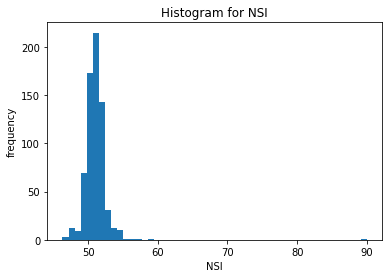

Median: 51.01
97% confidence interval: [47.88, 54.78]


In [ ]:
plt.hist(nsi_list, bins=50)
plt.title('Histogram for NSI')
plt.xlabel("NSI")
plt.ylabel("frequency")
plt.show()
median = np.median(nsi_list)
print(f'Median: {round(median, 2)}')
percentiles = np.percentile(nsi_list, [1.5, 98.5])
print(f'97% confidence interval: [{round(percentiles[0], 2)}, {round(percentiles[1], 2)}]')

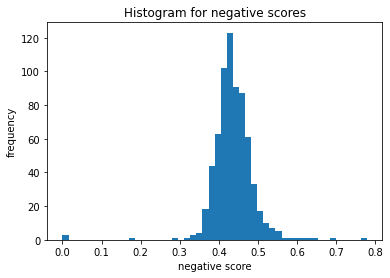

Median: 0.43
97% confidence interval: [0.35, 0.55]


In [ ]:
plt.hist(negative_scores, bins=50)
plt.title('Histogram for negative scores')
plt.xlabel("negative score")
plt.ylabel("frequency")
plt.show()
median = np.median(negative_scores)
print(f'Median: {round(median, 2)}')
percentiles = np.percentile(negative_scores, [1.5, 98.5])
print(f'97% confidence interval: [{round(percentiles[0], 2)}, {round(percentiles[1], 2)}]')

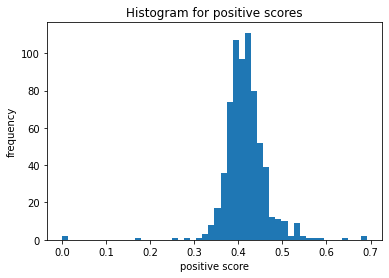

Median: 0.41
97% confidence interval: [0.34, 0.53]


In [ ]:
plt.hist(positive_scores, bins=50)
plt.title('Histogram for positive scores')
plt.xlabel("positive score")
plt.ylabel("frequency")
plt.show()
median = np.median(positive_scores)
print(f'Median: {round(median, 2)}')
percentiles = np.percentile(positive_scores, [1.5, 98.5])
print(f'97% confidence interval: [{round(percentiles[0], 2)}, {round(percentiles[1], 2)}]')

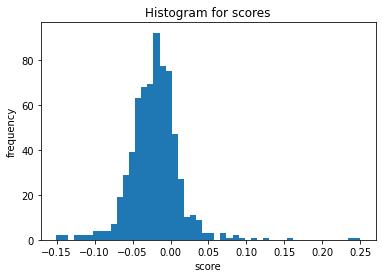

Median: -0.02
97% confidence interval: [-0.1, 0.07]


In [ ]:
scores = np.array(positive_scores) - np.array(negative_scores)
plt.hist(scores, bins=50)
plt.title('Histogram for scores')
plt.xlabel("score")
plt.ylabel("frequency")
plt.show()
median = np.median(scores)
print(f'Median: {round(median, 2)}')
percentiles = np.percentile(scores, [1.5, 98.5])
print(f'97% confidence interval: [{round(percentiles[0], 2)}, {round(percentiles[1], 2)}]')

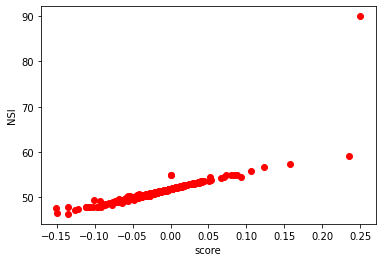

In [ ]:
plt.plot(scores, nsi_list, 'ro')
#plt.xlim([-1, 1])
#plt.ylim([0, 100])
plt.xlabel("score")
plt.ylabel("NSI")
plt.show()

Reference points:

score = -1 -> NSI = 0

score = -0,1 -> NSI = 20

score = -0.02 -> NSI = 50

score = 0.07 -> NSI = 90

score = 1 -> NSI = 100

In [ ]:
# Define points to fit
score_points = [-1, -0.01, -0.02, 0.07, 1]
NSI_points = [0, 20, 50, 90, 100]

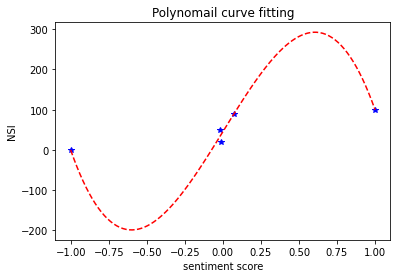

In [ ]:
# Curve fitting
n = 3 # degree
coefficients = np.polyfit(score_points, NSI_points, n)
x_plot = np.linspace(-1, 1, 100)
y_plot = np.polyval(coefficients, x_plot)
plt.plot(score_points, NSI_points, 'b*')
plt.plot(x_plot, y_plot, 'r--')
plt.title("Polynomail curve fitting")
plt.xlabel("sentiment score")
plt.ylabel("NSI")
plt.show()

In [ ]:
def sigmoid (x, A, h, slope, C):
    return A/(1 + np.exp(-x*slope + h)) + C

In [ ]:
# Sigmoid parameters
A = 100 # we want values from 0 to 100
h = 0.2 # give more importance to negative scores
slope = 20 # the higher the slope, the higher the variance around score 0
C = 0 # we don't want a vertical offset

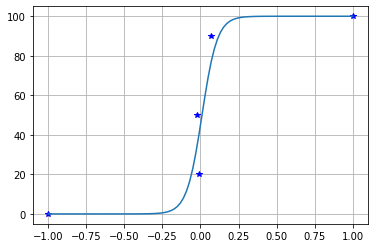

1.687529854660775e-07 45.016600268752214 99.99999974825013


In [ ]:
x_plot = np.linspace(-1, 1, 100)
f = np.vectorize(sigmoid)
y_plot = f(x_plot, A, h, slope, C)
plt.plot(score_points, NSI_points, 'b*')
plt.plot(x_plot, y_plot)
plt.grid()
plt.show()
print(sigmoid(-1, A, h, slope, C), sigmoid(0, A, h, slope, C), sigmoid(1, A, h, slope, C))

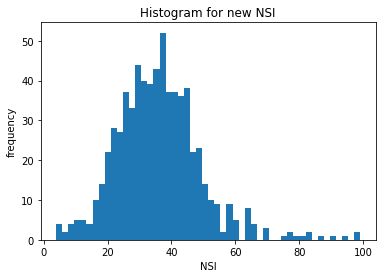

Median: 35.44
97% confidence interval: [9.67, 76.81]


In [ ]:
new_NSI = f(scores, A, h, slope, C)
plt.hist(new_NSI, bins=50)
plt.title('Histogram for new NSI')
plt.xlabel("NSI")
plt.ylabel("frequency")
plt.show()
median = np.median(new_NSI)
print(f'Median: {round(median, 2)}')
percentiles = np.percentile(new_NSI, [1.5, 98.5])
print(f'97% confidence interval: [{round(percentiles[0], 2)}, {round(percentiles[1], 2)}]')